In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF 
import numpy as np
from sklearn.metrics import mean_absolute_error

In [2]:
def process_data(file_paths):
    # Initialize empty lists to store data
    whisker1_data = []
    whisker2_data = []
    laser1_data = []
    laser2_data = []
    GT1_data = []
    GT2_data = []
    orientation_data = []
    position_data = []

    for file_path in file_paths:
        # Read data from file
        data = pd.read_csv(file_path)
        
        # Extract data columns
        whisker1_data.append(data.iloc[:, :3].values)
        whisker2_data.append(data.iloc[:, 3:6].values)
        laser1_data.append(data.iloc[:, 6].values)
        laser2_data.append(data.iloc[:, 7].values)
        GT1_data.append(data.iloc[:, -2].values)
        GT2_data.append(data.iloc[:, -1].values)
        orientation_data.append(data.iloc[:, 9].values)
        position_data.append(data.iloc[:, 11:13].values)
    
    # Concatenate data from all files
    whisker1_data = np.concatenate(whisker1_data)
    whisker2_data = np.concatenate(whisker2_data)
    laser1_data = np.concatenate(laser1_data)
    laser2_data = np.concatenate(laser2_data)
    GT1_data = np.concatenate(GT1_data)
    GT2_data = np.concatenate(GT2_data)
    orientation_data = np.concatenate(orientation_data)
    position_data = np.concatenate(position_data)
    
    return whisker1_data, whisker2_data, laser1_data, laser2_data, GT1_data, GT2_data, orientation_data, position_data

def filter_data(whisker_data,channel, laser_data, GT_data, threshold, orientation_data, position_data):
    filter_indices = (whisker_data[:,channel-1] >= threshold) & (GT_data > 0)
    whisker_filtered = whisker_data[filter_indices]
    laser_filtered = laser_data[filter_indices]
    GT_filtered = GT_data[filter_indices]
    orientation_filtered = orientation_data[filter_indices]
    position_filtered = position_data[filter_indices]
    return whisker_filtered, laser_filtered, GT_filtered, orientation_filtered, position_filtered

In [3]:
from sklearn.preprocessing import StandardScaler

file_paths = ['0326/data1.csv', '0326/data11.csv', '0326/data3.csv', '0326/data4.csv', 
              '0326/data5.csv', '0326/data6.csv', '0326/data7.csv', '0326/data8.csv', 
              '0326/data9.csv', '0326/data10.csv', '0326/data2.csv', '0326/data12.csv', '0326/test2.csv']
train_whisker1, train_whisker2, train_laser1, train_laser2, train_GT1, train_GT2, train_orientation, train_position= process_data(file_paths[:9])
test_whisker1, test_whisker2, test_laser1, test_laser2, test_GT1, test_GT2, test_orientation, test_position = process_data(file_paths[9:12])
real_whisker1, real_whisker2, real_laser1, real_laser2, real_GT1, real_GT2, real_orientation, real_position = process_data([file_paths[12]])
# print(real_whisker1)
# test_whisker1_1, test_whisker2_1, test_laser1_1, test_laser2_1, test_GT1_1, test_GT2_1, orientation_1, position_1 = process_data(file_paths[9])
# test_whisker1_2, test_whisker2_2, test_laser1_2, test_laser2_2, test_GT1_2, test_GT2_2, orientation_2, position_2 = process_data(file_paths[10])
# test_whisker1_3, test_whisker2_3, test_laser1_3, test_laser2_3, test_GT1_3, test_GT2_3, orientation_3, position_3 = process_data(file_paths[11])
filter_threshold = 10
train_whisker1_filtered1, train_laser1_filtered, train_GT1_filtered, _, _ = filter_data(train_whisker1, 1, train_laser1, train_GT1, filter_threshold, train_orientation, train_position)
train_whisker2_filtered1, train_laser2_filtered, train_GT2_filtered, _, _ = filter_data(train_whisker2, 2, train_laser2, train_GT2, filter_threshold, train_orientation, train_position)
test_whisker1_filtered1, test_laser1_filtered, test_GT1_filtered, test_orientation1_filtered, test_position1_filtered = filter_data(test_whisker1, 1, test_laser1, test_GT1, filter_threshold, test_orientation, test_position)
test_whisker2_filtered1, test_laser2_filtered, test_GT2_filtered, test_orientation2_filtered, test_position2_filtered = filter_data(test_whisker2, 2, test_laser2, test_GT2, filter_threshold, test_orientation, test_position)

# test_whisker1_1_filtered1, test_whisker2_1_filtered, test_laser1_1_filtered, test_laser2_1_filtered, test_GT1_1_filtered, test_GT2_1_filtered, orientation_1_filtered, position_1_filtered = process_data(file_paths[9])
# test_whisker1_2, test_whisker2_2, test_laser1_2, test_laser2_2, test_GT1_2, test_GT2_2, orientation_2, position_2 = process_data(file_paths[10])
# test_whisker1_3, test_whisker2_3, test_laser1_3, test_laser2_3, test_GT1_3, test_GT2_3, orientation_3, position_3 = process_data(file_paths[11])
scaler = StandardScaler()
train_whisker1_filtered1 = scaler.fit_transform(train_whisker1_filtered1)
test_whisker1_filtered1 = scaler.transform(test_whisker1_filtered1)
real_whisker1_filtered1 = scaler.transform(real_whisker1)
train_whisker2_filtered1 = scaler.fit_transform(train_whisker2_filtered1)
test_whisker2_filtered1 = scaler.transform(test_whisker2_filtered1)
real_whisker2_filtered1 = scaler.transform(real_whisker2)
train_GT1_NM = scaler.fit_transform(train_GT1_filtered.reshape(-1,1))
print(test_whisker1_filtered1)
mean_train = scaler.mean_
std_train = scaler.scale_
print(mean_train)
print(std_train)


filtered_data_counts = np.zeros((len(file_paths), 2), dtype=int)  # 2表示有两个过滤后的数据

# 针对每个文件分别过滤数据并统计数量
for i, file_path in enumerate(file_paths):
    whisker1, whisker2, laser1, laser2, GT1, GT2, orientation, position = process_data([file_path])
    
    # 进行数据过滤
    whisker1_filtered, laser1_filtered, GT1_filtered, _, _ = filter_data(whisker1, 1, laser1, GT1, filter_threshold, orientation, position)
    whisker2_filtered, laser2_filtered, GT2_filtered, _, _ = filter_data(whisker2, 2, laser2, GT2, filter_threshold, orientation, position)
    
    # 计算过滤后的数量并存储到数组中
    filtered_data_counts[i] = [whisker1_filtered.shape[0], whisker2_filtered.shape[0]]
    
train_whisker1_trial_size=filtered_data_counts[:9,0]
train_whisker2_trial_size=filtered_data_counts[:9,1]
test_whisker1_trial_size=filtered_data_counts[9:,0]
test_whisker2_trial_size=filtered_data_counts[9:,1]

[[-2.43357747  2.36815424  0.83805079]
 [-2.20121342  2.24234975  0.72783386]
 [-2.02689718  2.10079011  0.64680836]
 ...
 [-1.6158135   1.70836128  1.25688171]
 [-1.6609758   1.82454165  1.34921752]
 [-1.70789893  1.95116343  1.39700773]]
[45.58733941]
[20.80633402]


tensor([[20.3978],
        [22.6115],
        [22.6818],
        [25.3063],
        [28.8660],
        [33.0510],
        [32.5500],
        [37.1775],
        [37.4059],
        [38.5719],
        [42.7535],
        [42.7070],
        [45.2451],
        [45.6263],
        [45.4327],
        [42.0794],
        [42.1697],
        [41.2835],
        [43.0399],
        [42.6897],
        [41.9424],
        [42.0057],
        [40.7940],
        [42.0327],
        [40.8723],
        [36.3520],
        [34.2687],
        [32.5376],
        [30.5996],
        [32.9754],
        [30.3656],
        [28.9271]], device='cuda:0') tensor([19.3145, 22.7383, 26.0354, 29.1120, 32.2243, 35.0112, 37.6839, 40.0332,
        42.0660, 43.9104, 45.2878, 46.4570, 47.2020, 47.6143, 47.8780, 47.7431,
        47.4513, 46.7910, 46.0047, 44.8161, 43.5723, 42.2935, 40.6702, 38.9729,
        37.2845, 35.6557, 33.9148, 32.1568, 30.5856, 29.0172, 27.6664, 26.4161],
       device='cuda:0')
tensor([[0.2105],
        [0.

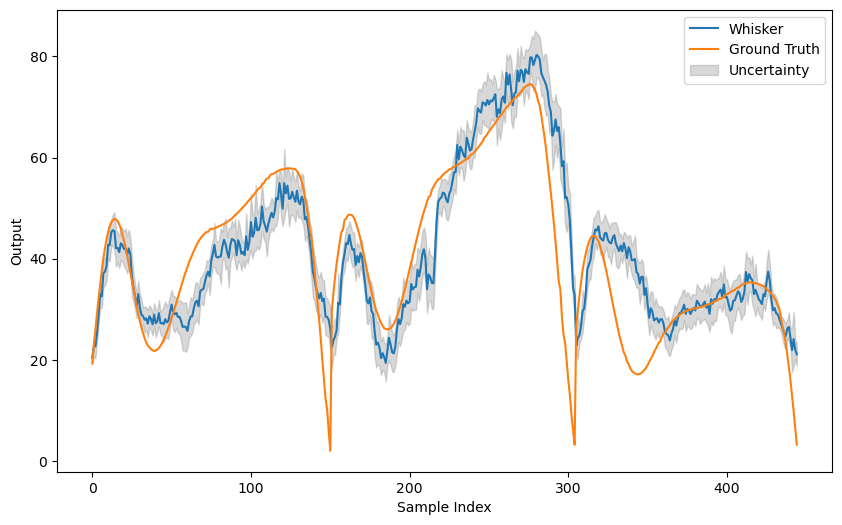

In [11]:
#whisker1 uncertainty aware mlp
from uncertainty import *
from model import *
from torch.utils.data import DataLoader, TensorDataset
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MLP_adf_dropout(input_size=3, hidden_size=32, output_size=1, p=0.05, noise_variance=0.01, min_variance=1e-3).to(device)
best_model_path='MLP_best_model_save/mlp_bs_32_lr_0.001_reg_0.001_do_0.1_rmse_9.1976_whisker1.pt'
model.load_state_dict(torch.load(best_model_path))
test_whisker_tensor = torch.Tensor(test_whisker1_filtered1)
test_GT_tensor = torch.Tensor(test_GT1_filtered)
test_dataset = TensorDataset(test_whisker_tensor, test_GT_tensor)
testloader = DataLoader(test_dataset, batch_size=32, shuffle=False)
test_image_folder = 'UA_MLP_test_image_save_whisker1'
os.makedirs(test_image_folder, exist_ok=True)
test_image_output_file = f'{test_image_folder}/p_0.05_noise_1e-3_modelvarianceweight_5_whisker1.png'
eval_time = time.time()
RMSE, MAE, neg_log_likelihood, test_pre1, test_uncertainty1 = evaluate(
        model,
        test_dataset,
        test_image_output_file,
        use_adf=True, 
        use_mcdo=True)

eval_time = time.time() - eval_time

print('RMSE                = {}'.format(RMSE))
print('MAE             = {}'.format(MAE))
print('Negative log-likelihood = {}'.format(neg_log_likelihood))
print('Time                    = {}'.format(eval_time))

MSE = 238.89395053433265
MAE = 12.95507335590195


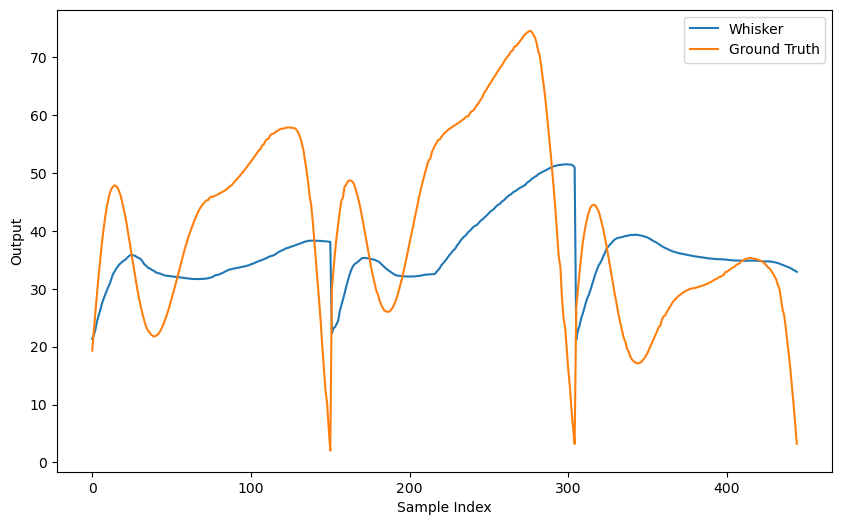

In [12]:
import numpy as np
import os
import matplotlib.pyplot as plt
from KF import KalmanFilter
from sklearn.metrics import mean_squared_error, mean_absolute_error

def apply_kalman_filter(initial_state, test_pre, uncertainties):
    kf = KalmanFilter(initial_state, initial_covariance, process_noise)
    estimates = []
    for z, uncertainty in zip(test_pre, uncertainties):
        kf.predict()
        measurement_noise = np.array([[uncertainty]])  # 动态测量噪声
        kf.update(np.array([z]), measurement_noise)  # 传递动态噪声到更新步骤
        estimates.append(kf.get_current_estimate())
    return estimates

# 数据分段
test_GT1_filtered_1 = test_GT1_filtered[0:151]
test_GT1_filtered_2 = test_GT1_filtered[151:305]
test_GT1_filtered_3 = test_GT1_filtered[305:445]
test_pre1_1 = test_pre1[0:151]
test_pre1_2 = test_pre1[151:305]
test_pre1_3 = test_pre1[305:445]

# 假设 `test_uncertainty` 是你模型预测的不确定性输出
test_uncertainty1_1 = test_uncertainty1[0:151]
test_uncertainty1_2 = test_uncertainty1[151:305]
test_uncertainty1_3 = test_uncertainty1[305:445]

# 初始状态和噪声配置
initial_states = [test_pre1_1[0], test_pre1_2[0], test_pre1_3[0]]
initial_covariance = np.array([[5]])
process_noise = np.array([[0]])

# 应用卡尔曼滤波
test_kal1_1 = apply_kalman_filter(initial_states[0], test_pre1_1, test_uncertainty1_1)
test_kal1_2 = apply_kalman_filter(initial_states[1], test_pre1_2, test_uncertainty1_2)
test_kal1_3 = apply_kalman_filter(initial_states[2], test_pre1_3, test_uncertainty1_3)

# 合并结果
test_kal1 = test_kal1_1 + test_kal1_2 + test_kal1_3

# 计算损失
MSE_loss = mean_squared_error(test_kal1, test_GT1_filtered)
MAE_loss = mean_absolute_error(test_kal1, test_GT1_filtered)

print(f'MSE = {MSE_loss}')
print(f'MAE = {MAE_loss}')

# 保存图像
test_image_folder = 'UA_MLP_KF_test_image_save_whisker1'
os.makedirs(test_image_folder, exist_ok=True)
test_image_output_file = f'{test_image_folder}/p_0.05_noise_1e-2_modelvarianceweight_1_whisker1_kf_certainnoise_5_0.1_0.5_1.png'

plt.figure(figsize=(10, 6))
plt.plot(test_kal1, label='Whisker')
plt.plot(test_GT1_filtered, label='Ground Truth')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Output')
plt.savefig(test_image_output_file)


tensor([[24.7007],
        [28.9209],
        [31.5662],
        [33.7092],
        [33.6550],
        [39.1740],
        [39.1500],
        [45.2925],
        [44.8545],
        [48.9219],
        [52.6935],
        [54.5068],
        [55.5964],
        [53.2628],
        [54.9939],
        [55.9371],
        [57.4400],
        [55.7300],
        [56.8736],
        [55.7237],
        [51.6113],
        [50.0060],
        [49.1420],
        [48.2985],
        [47.7090],
        [46.7383],
        [44.0822],
        [42.4961],
        [42.4181],
        [42.0583],
        [42.5235],
        [41.6965]], device='cuda:0') tensor([19.4162, 22.9306, 26.3041, 29.4483, 32.6249, 35.4714, 38.2090, 40.6245,
        42.7263, 44.6563, 46.1223, 47.3967, 48.2679, 48.7970, 49.1928, 49.1999,
        49.0688, 48.5818, 47.9773, 46.9796, 45.9458, 44.7728, 43.4724, 41.8905,
        40.4189, 39.0021, 37.4630, 35.9302, 34.5633, 33.1849, 32.0239, 30.9426],
       device='cuda:0')
tensor([[ 3.0473],
        [ 

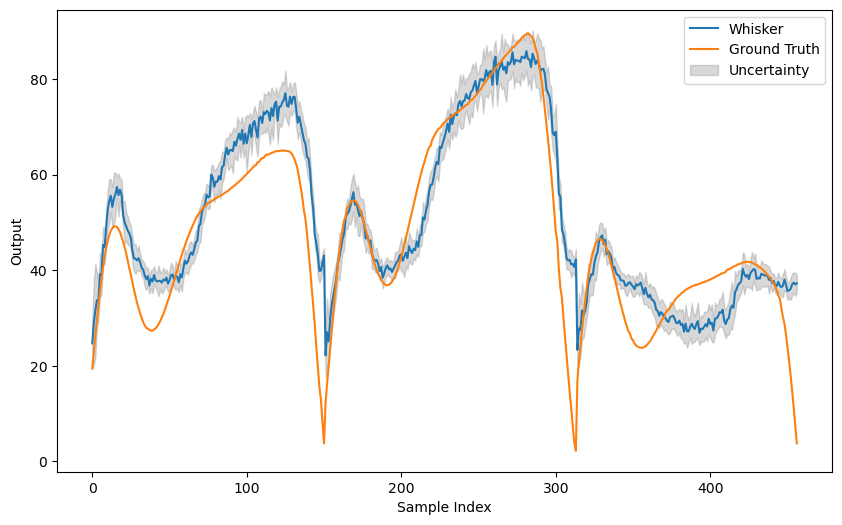

In [50]:
#whisker2 uncertainty aware mlp
from uncertainty import *
from model import *
from torch.utils.data import DataLoader, TensorDataset
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MLP_adf_dropout(input_size=3, hidden_size=32, output_size=1, p=0.05, noise_variance=0.01, min_variance=0.001).to(device)
best_model_path='MLP_best_model_save/mlp_bs_32_lr_0.001_reg_0.01_do_0.1_rmse_10.2471_whisker2.pt'
model.load_state_dict(torch.load(best_model_path))
test_whisker_tensor = torch.Tensor(test_whisker2_filtered1)
test_GT_tensor = torch.Tensor(test_GT2_filtered)
test_dataset = TensorDataset(test_whisker_tensor, test_GT_tensor)
testloader = DataLoader(test_dataset, batch_size=32, shuffle=False)
test_image_folder = 'UA_MLP_test_image_save_whisker2'
os.makedirs(test_image_folder, exist_ok=True)
test_image_output_file = f'{test_image_folder}/p_0.05_noise_1e-2_modelvarianceweight_1_whisker2.png'
eval_time = time.time()
RMSE, MAE, neg_log_likelihood, test_pre2, test_uncertainty2 = evaluate(
        model,
        test_dataset,
        test_image_output_file,
        use_adf=True, 
        use_mcdo=True)

eval_time = time.time() - eval_time

print('RMSE                = {}'.format(RMSE))
print('MAE             = {}'.format(MAE))
print('Negative log-likelihood = {}'.format(neg_log_likelihood))
print('Time                    = {}'.format(eval_time))